<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("..\Data\housing.data", header=None, names=names, delim_whitespace=True)

Variables
There are 14 attributes in each case of the dataset. They are:
<br>CRIM - per capita crime rate by town
<br> ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
<br>INDUS - proportion of non-retail business acres per town.
<br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br>NOX - nitric oxides concentration (parts per 10 million)
<br>RM - average number of rooms per dwelling
<br>AGE - proportion of owner-occupied units built prior to 1940
<br>DIS - weighted distances to five Boston employment centres
<br>RAD - index of accessibility to radial highways
<br>TAX - full-value property-tax rate per $10,000


PTRATIO - pupil-teacher ratio by town
<br> B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
<br> LSTAT - % lower status of the population
<br>MEDV - Median value of owner-occupied homes in $1000's

In [4]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

<AxesSubplot:xlabel='RM'>

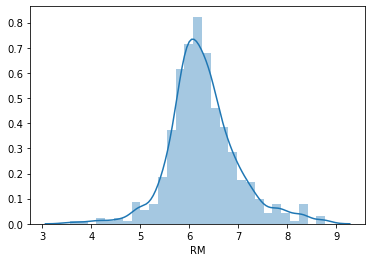

In [9]:
#  ANSWER
sns.distplot(data['RM'])

##### 2. Plot Histogram of `MEDV`

<AxesSubplot:xlabel='MEDV'>

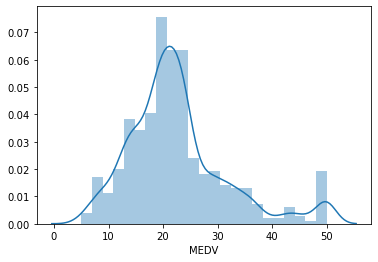

In [10]:
# ANSWER
sns.distplot(data['MEDV'])

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

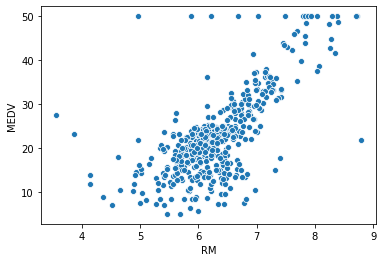

In [12]:
# ANSWER
sns.scatterplot(x = data['RM'],
                y = data['MEDV'])


##### 3.B Is there any trend? State your observation.

In [13]:
# No. of rooms is positively correlated to median house value

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [14]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [23]:
# Segregate population
large_houses = data[data['RM'] >= 6]
small_houses = data[data['RM'] < 6]

In [29]:
#Take samples
large_house_sample = large_houses['MEDV'].sample(100)
small_house_sample = small_houses['MEDV'].sample(100)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

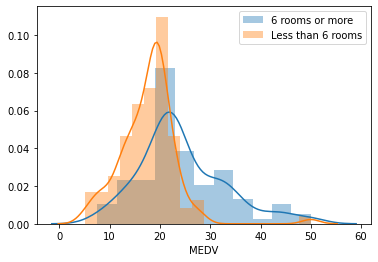

In [46]:
# ANSWER
sns.distplot(large_house_sample, label = '6 rooms or more')
sns.distplot(small_house_sample, label = 'Less than 6 rooms')

plt.legend()

#Seems like smaller houses definitely have a smaller median value

##### 7. Calculate Variance

Calculate variance for both samples.

In [47]:
var_large = large_house_sample.var()
var_small = small_house_sample.var()
print('large houses variance:', var_large)
print('small houses variance:', var_small)

large houses variance: 75.01114747474747
small houses variance: 32.685571717171726


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [ ]:
# Sp is not pooled standard deviation. Pooled SD is weighted average of both SDs.


In [60]:
n = 100

# Calculating pooled SD assuming both samples have equal variance
pooled_var = ((n-1)*var_large + (n-1)*var_small) / (n + n - 2)
pooled_sd = math.sqrt(pooled_var)
test_var_pooled = (pooled_var/n + pooled_var/n)
print('standard error using pooled variance:',math.sqrt(test_var_pooled))

#Calculating SD assuming unequal variance
nonpooled_test_var = (var_large/n) + (var_small/n)
nonpooled_test_std_error = math.sqrt(test_var)
print('standard error not assuming equal variance:',nonpooled_test_std_error)

standard error using pooled variance: 1.0377702982448438
standard error not assuming equal variance: 1.0377702982448438


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [63]:
# ANSWER
mean_diff = large_house_sample.mean() - small_house_sample.mean()
t_stat = mean_diff / nonpooled_test_std_error
t_stat

6.436877227357276

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [64]:
# ANSWER
df = n + n - 2
print('Degrees of freedom:',df)

Degrees of freedom: 198


##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [71]:
# ANSWER
from scipy import stats
p_value = 1 - stats.t.cdf(t_stat, df = df)
p_value

4.504933093230079e-10

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [76]:

def check_sig(p, alpha, two_tailed = 0):
    if two_tailed == 1:
        alpha = alpha/2
    if p < alpha:
        print('The result is significant, reject H0')
    else:
        print('The result failed to reject H0')

In [85]:
# Checking our previous t statistic:
check_sig(p_value,alpha, two_tailed = 1)

The result is significant, reject H0


In [0]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [102]:
# ANSWER
def t_test_for_identical_means(samp1,samp2,alpha):
    #Calculate difference in means
    mean_diff = abs(samp1.mean()-samp2.mean())
    
    #Calculate test standard error
    samp1_n = len(samp1)
    samp2_n = len(samp2)
    test_var = (samp1.var()/samp1_n) + (samp2.var()/samp2_n)
    test_std_error = math.sqrt(test_var)
    
    #Calculate t-statistic
    t_stat = mean_diff / test_std_error
    
    #Calculate p-value
    df = samp1_n + samp2_n - 2
    p = (1 - stats.t.cdf(t_stat,df = df)) * 2
    
    #Print conclusion
    if p < alpha:
        print('The evidence is significant, reject H0 with a p-value of',p)
    else:
        print('There is insufficient evidence to reject H0 with a p-value of',p)
    

In [103]:
t_test_for_identical_means(large_house_sample,small_house_sample,0.05)

The evidence is significant, reject H0 with a p-value of 9.009866186460158e-10


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [104]:
stats.ttest_ind(large_house_sample,small_house_sample,)

Ttest_indResult(statistic=6.4368772273572725, pvalue=9.009864666027167e-10)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



